In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# read image
img = cv2.imread('test.jpg')

# BGR -> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = img[:, :, ::-1]

img.shape, type(img) # (H, W, Channels), (H, W)

((596, 1060, 3), numpy.ndarray)

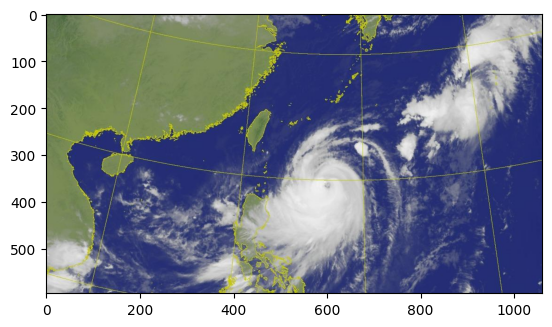

In [ ]:
plt.imshow(img)

In [ ]:
# RGB -> Gray scale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray.shape # (H, W)

(596, 1060)

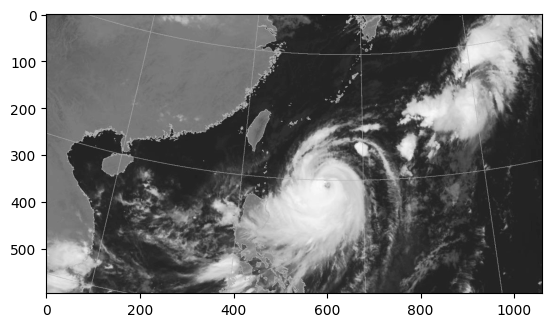

In [ ]:
plt.imshow(img_gray, cmap='gray')

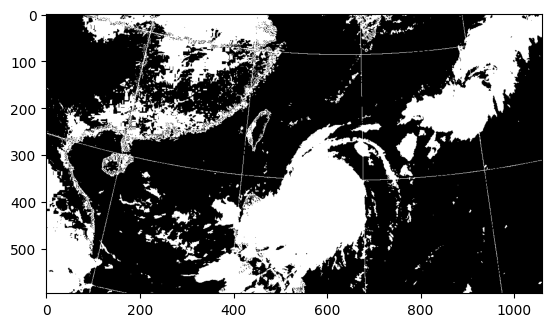

In [ ]:
# Binary Thresholding
# 0~255
# <127 -> 0
# >127 -> 255
ret, img_th = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(img_th, cmap='gray')

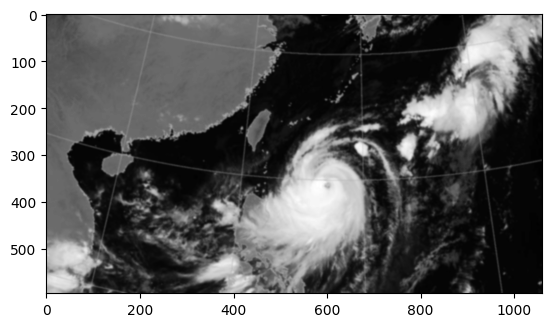

In [ ]:
# Blur
# kernel_size 越大，模糊效果越明顯
# https://zh.wikipedia.org/zh-tw/%E9%AB%98%E6%96%AF%E6%A8%A1%E7%B3%8A
kernel_size = 7
img_blurred = cv2.GaussianBlur(
    img_gray,
    (kernel_size, kernel_size),
    0
)
plt.imshow(img_blurred, cmap='gray')

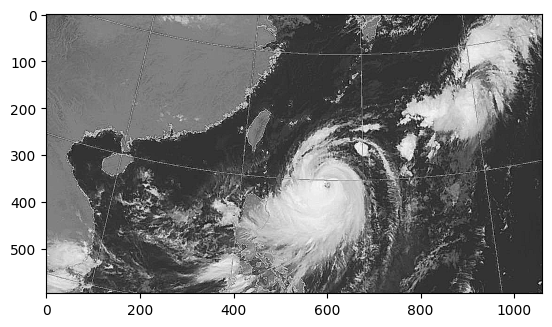

In [ ]:
# Sharpening
kernel = np.array([[-1,-1,-1],
                   [-1, 9,-1],
                   [-1,-1,-1]])
# 卷積
img_sharpened = cv2.filter2D(img_gray, -1, kernel)
plt.imshow(img_sharpened, cmap='gray')

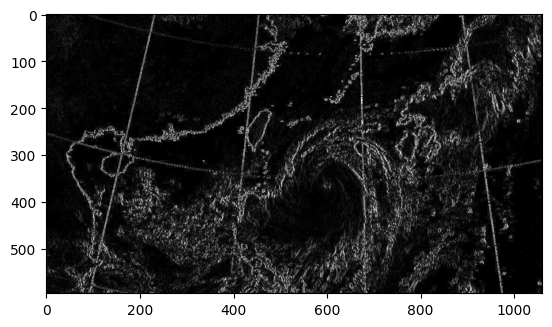

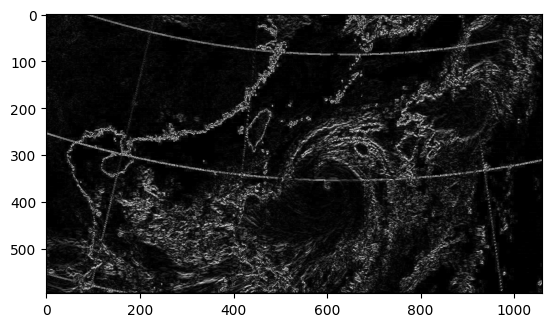

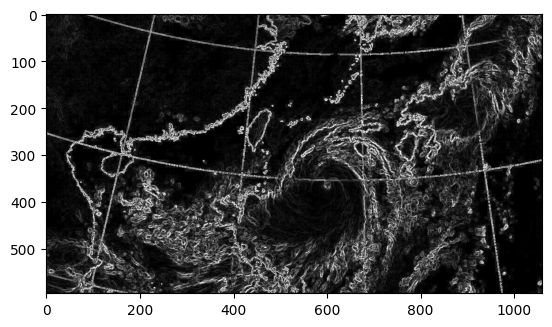

In [ ]:
# Edge Detection - Sobel
# cv.Sobel(src, ddepth, dx, dy)
# ddepth: numpy.array 資料類型, cv2.CV_64F: 64位元浮點數
# dx, dy: x, y方向微分的階數
sobelX = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1)

# absolute value
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobel_com = cv2.bitwise_or(sobelX, sobelY)

plt.imshow(sobelX, cmap='gray')
plt.show()
plt.imshow(sobelY, cmap='gray')
plt.show()
plt.imshow(sobel_com, cmap='gray')
plt.show()

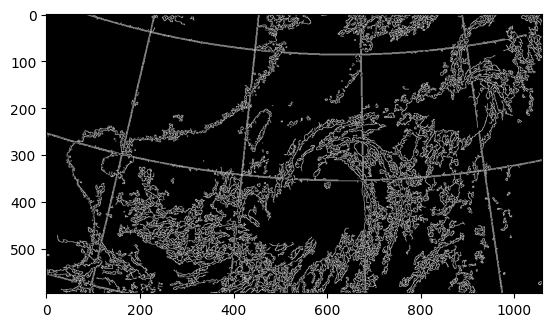

In [ ]:
# Edge Detection - Canny
# ref: https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html
# cv.Canny(image, threshold1, threshold2)
# threshold1: 1st(minVal) threshold for the hysteresis procedure
# threshold2: 2nd(maxVal) threshold for the hysteresis procedure
img_canny = cv2.Canny(img_gray, 30, 130)
plt.imshow(img_canny, cmap='gray')